In this notebook, I will compare several binary classification models using a simulated dataset.

The data is simulated using scikit-learn's ```make_classification```. First, the models will be trained and tested on a simple dataset with 2 relevant features. Later, they will be trained and tested on a more complex dataset with both redundant and repeated features without any feature engineering. ```make_classification``` documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

I will try the following scikit-learn classifiers (click on the model name for documentation): [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),
[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html),
[LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html),
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html),
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

I will also add multiplayer perceptrons in Keras and PyTorch and evaluate their performances.

Let's create a dataframe to store accuracies of the classifier for comparison later.

In [1]:
import pandas as pd

accuracy_df = pd.DataFrame(columns = ['Dataset 1', 'Dataset 2', 'Dataset 3', 
                                      'Dataset 4', 'Dataset 5'])

In [2]:
# create simulated data with 2 features
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 1000,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           random_state = 47)

In [3]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 47)

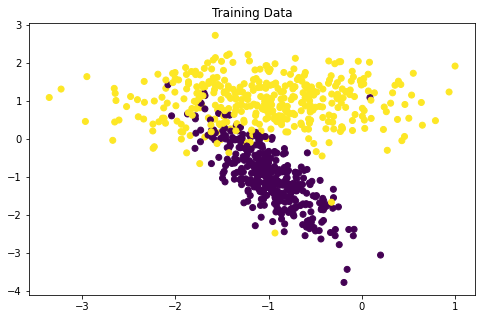

In [4]:
# plot the training data
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [5]:
# import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [6]:
# initialize scikit-learn classifiers with mostly default values
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier()
# initialize Linear SVC with max_iter = 10000 to ensure convergence
linear_svc = LinearSVC(max_iter = 10000)
kn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()


clf_list = [log_reg, dt_clf, linear_svc, kn_clf, rf_clf, gb_clf]

clf_names = ['Logistic Regression', 'Decision Tree Classifier', 'Linear SVC',
            'KNN Classifier', 'Random Forest Classifier', 'Gradient Boosting Classfier']

In [7]:
# define a function that will take in training and testing data,
# and then will fit the classifiers and score their predictions

def scikit_clf_fit_score(x_train, y_train, x_test, y_test, dataset_num):
    
    # loop over each classifier in clf_list, fit, score, add score to accuracy_df
    dataset = f'Dataset {dataset_num}'
    
    for i in range(6):
        clf_list[i].fit(x_train, y_train)
        score = clf_list[i].score(x_test, y_test)
        accuracy_df.loc[clf_names[i], dataset] = score
        print(f'{clf_names[i]}: {score}')

In [8]:
%%time
scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 1)

Logistic Regression: 0.928
Decision Tree Classifier: 0.944
Linear SVC: 0.928
KNN Classifier: 0.952
Random Forest Classifier: 0.948
Gradient Boosting Classfier: 0.952
Wall time: 432 ms


In [9]:
# create a function that fits and evaluates a binary classification model in Keras
from keras.models import Sequential
from keras.layers import Dense

def keras_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # three layer model with ReLU applied to the first two layers
    # and sigmoid to the last one
    model = Sequential([
    Dense(30, input_shape=(x_train.shape[1],), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])
    
    # compile the model using binary crossentropy as the loss function and
    # binary accuracy as the evaluation metric
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    model.fit(x_train, y_train, epochs = n_epochs)
    
    # evaluate using the test data
    results = model.evaluate(x_test, y_test)
    accuracy_df.loc['Keras NN', dataset] = float(f'{results[1]:.3}')
    print(results)

In [10]:
%%time
keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5989 - binary_accuracy: 0.6827
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4108 - binary_accuracy: 0.9200
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3094 - binary_accuracy: 0.9240
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2541 - binary_accuracy: 0.9213
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2250 - binary_accuracy: 0.9240
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2143 - binary_accuracy: 0.9267
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2073 - binary_accuracy: 0.9267
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2043 - binary_accuracy: 0.9280
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2021 - binary_accuracy: 0.9267
Epoch 10/50
24/24 [==============================] - 0s

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# BCELoss will be used for all neural networks
criterion = nn.BCELoss()

In [12]:
# create a binary classification model in PyTorch
# the NN will be the same except for the number of input nodes for all datasets

class TorchBinaryClassifier(nn.Module):
    
    def __init__(self, in_dimension):
        
        super(TorchBinaryClassifier, self).__init__()
        
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(in_dimension, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x

In [13]:
# speficy train and test data
from torch.utils.data import TensorDataset, DataLoader

# set up a function to get dataloaders
def pytorch_loaders(x_train, y_train, x_test, y_test):
    
    X_train_tensor = torch.from_numpy(x_train).float()
    Y_train_tensor = torch.from_numpy(y_train).float().squeeze()

    X_test_tensor = torch.from_numpy(x_test).float()
    Y_test_tensor = torch.from_numpy(y_test).float()

    trainset = TensorDataset(X_train_tensor, Y_train_tensor)
    testset = TensorDataset(X_test_tensor, Y_test_tensor)

    train_loader = DataLoader(trainset)
    test_loader = DataLoader(testset)
    
    return train_loader, test_loader

In [14]:
# set up a training function
def pytorch_train(model, train_loader, n_epochs = 50):
    
    # define the optimizer
    optimizer = optim.Adam(model.parameters())
    
    # set model to train mode
    model.train()
    print('PyTorch model training...')
    
    for epoch in range(n_epochs):
        # zero the running loss for the epoch
        running_loss = 0.0
        
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.view(-1,1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
        print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader.dataset)}')

In [15]:
import numpy as np

# set up a testing function
def pytorch_test(model, test_loader):
    # set model in evaluation mode
    model.eval()
    print('PyTorch model testing...')
    
    test_loss = 0.0
    correct_predictions = 0
    
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target.view(-1,1))
        test_loss += loss.item()
        predicted = np.round(output.detach().numpy().squeeze())
        actual = target.numpy().squeeze()
        
        if predicted == actual:
            correct_predictions += 1
            
    accuracy = correct_predictions/len(test_loader.dataset)
    avg_loss = test_loss/len(test_loader.dataset)
        
    print(f'Loss: {avg_loss}')
    print(f'Accuracy: {accuracy}')
        
    return accuracy

In [16]:
# define a function that will take in the training and testing data
# and combine the previously defined functions to train and test a pytorch nn

def pytorch_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # initialize a neural network
    net = TorchBinaryClassifier(x_train.shape[1])
    
    # get data loaders from the training and testing data
    train_loader, test_loader = pytorch_loaders(x_train, y_train, x_test, y_test)
    
    # train the network
    pytorch_train(net, train_loader)
    
    # add a blank line for a clearer print-out
    print('\n')
    # test the network
    accuracy = pytorch_test(net, test_loader)
    accuracy_df.loc['PyTorch NN', dataset] = accuracy

In [17]:
%%time
pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

PyTorch model training...
Epoch: 1, training loss: 0.291194644305273
Epoch: 2, training loss: 0.2053589914959351
Epoch: 3, training loss: 0.19964686211883478
Epoch: 4, training loss: 0.19546930733313395
Epoch: 5, training loss: 0.191587958801887
Epoch: 6, training loss: 0.18811269505271533
Epoch: 7, training loss: 0.185192177950521
Epoch: 8, training loss: 0.18159305474583137
Epoch: 9, training loss: 0.17922395772042607
Epoch: 10, training loss: 0.17651053711881104
Epoch: 11, training loss: 0.17414401592104695
Epoch: 12, training loss: 0.17186237744486668
Epoch: 13, training loss: 0.16951538161232504
Epoch: 14, training loss: 0.16750042375580232
Epoch: 15, training loss: 0.16540389313795822
Epoch: 16, training loss: 0.16345803535978182
Epoch: 17, training loss: 0.16166720961369355
Epoch: 18, training loss: 0.16023171261863597
Epoch: 19, training loss: 0.1587053255553601
Epoch: 20, training loss: 0.1579089507403193
Epoch: 21, training loss: 0.1562728409969559
Epoch: 22, training loss: 0

Let's look at ```accuracy_df```.

In [18]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,NaN,NaN,NaN,NaN
Decision Tree Classifier,0.944,NaN,NaN,NaN,NaN
Linear SVC,0.928,NaN,NaN,NaN,NaN
KNN Classifier,0.952,NaN,NaN,NaN,NaN
Random Forest Classifier,0.948,NaN,NaN,NaN,NaN
Gradient Boosting Classfier,0.952,NaN,NaN,NaN,NaN
Keras NN,0.956,NaN,NaN,NaN,NaN
PyTorch NN,0.952,NaN,NaN,NaN,NaN


All models achieved above 90% accuracy. The PyTorch MLP required by far the most lines of code and was the slowest.

Now I will test the same models on a dataset with 4 features, 3 of which are informative, and one is a random linear combination of the others.

In [19]:
X_2, Y_2 = make_classification(n_samples = 1000,
                           n_features = 4,
                           n_informative = 3,
                           n_redundant = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, 
                                                            test_size = 0.25,
                                                            random_state = 47)

<IPython.core.display.Javascript object>


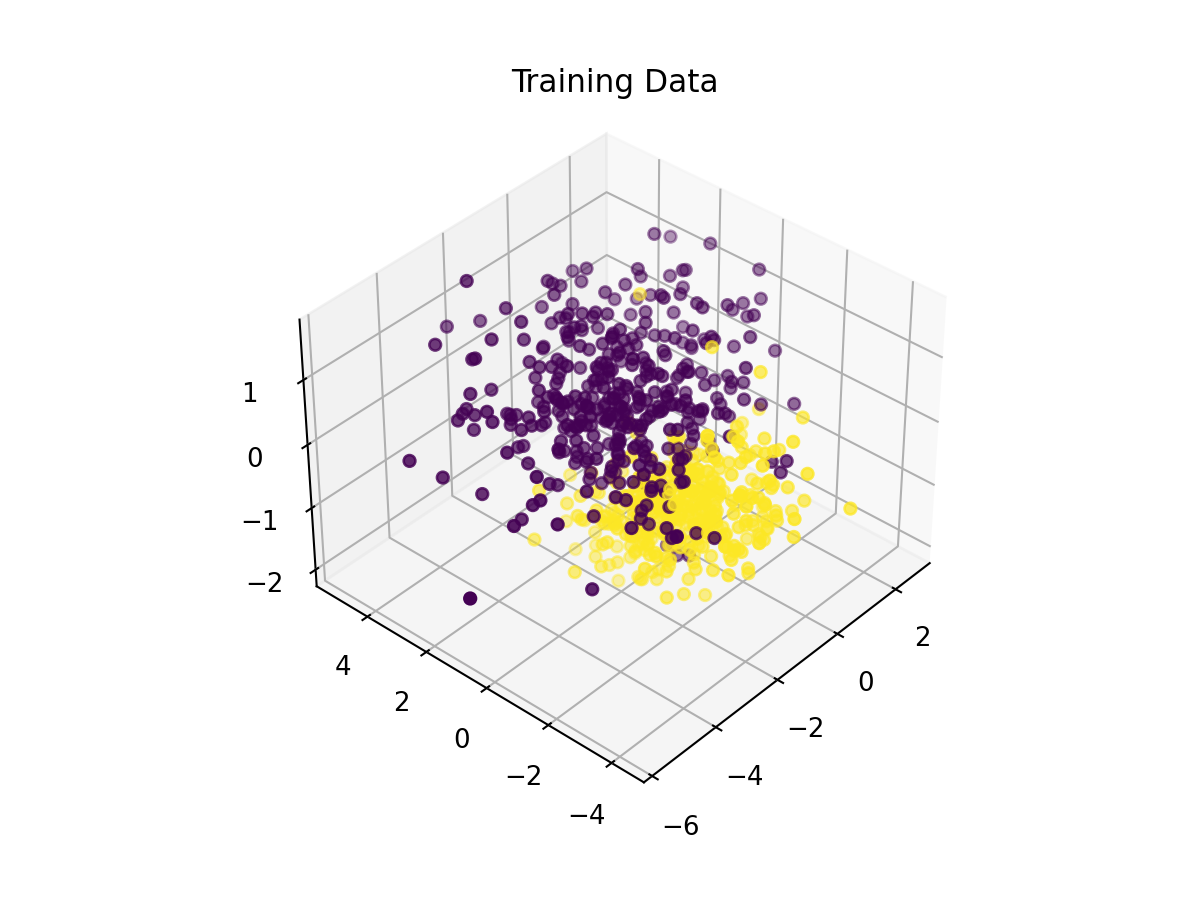

In [20]:
# display the new classes in terms of the first 3 features using an interactive 3d plot
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_2_train[:,0], X_2_train[:,1], X_2_train[:,2], c = Y_2_train)
plt.title('Training Data')
plt.show()

In [21]:
%%time
scikit_clf_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

Logistic Regression: 0.928
Decision Tree Classifier: 0.92
Linear SVC: 0.928
KNN Classifier: 0.944
Random Forest Classifier: 0.944
Gradient Boosting Classfier: 0.948
Wall time: 480 ms


In [22]:
%%time
keras_nn_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5138 - binary_accuracy: 0.8440
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3812 - binary_accuracy: 0.8827
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2990 - binary_accuracy: 0.9053
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2515 - binary_accuracy: 0.9173
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2258 - binary_accuracy: 0.9227
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2085 - binary_accuracy: 0.9307
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1998 - binary_accuracy: 0.9320
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1901 - binary_accuracy: 0.9333
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1845 - binary_accuracy: 0.9333
Epoch 10/50
24/24 [==============================] - 0s

In [23]:
%%time
pytorch_nn_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

PyTorch model training...
Epoch: 1, training loss: 0.24561626482767981
Epoch: 2, training loss: 0.1834567576473561
Epoch: 3, training loss: 0.1776713578255601
Epoch: 4, training loss: 0.1732659674780059
Epoch: 5, training loss: 0.16982482764116147
Epoch: 6, training loss: 0.16701209597135652
Epoch: 7, training loss: 0.16425421862503398
Epoch: 8, training loss: 0.16190745687624622
Epoch: 9, training loss: 0.15991807205123307
Epoch: 10, training loss: 0.15858710405270562
Epoch: 11, training loss: 0.15690177372070913
Epoch: 12, training loss: 0.15556766635394645
Epoch: 13, training loss: 0.15434177762818638
Epoch: 14, training loss: 0.15266109989000862
Epoch: 15, training loss: 0.15136133898082402
Epoch: 16, training loss: 0.14990126581886318
Epoch: 17, training loss: 0.14830564098827845
Epoch: 18, training loss: 0.1468892136147375
Epoch: 19, training loss: 0.1456727617351529
Epoch: 20, training loss: 0.14434133934075735
Epoch: 21, training loss: 0.14307222313975104
Epoch: 22, training lo

In [24]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,NaN,NaN,NaN
Decision Tree Classifier,0.944,0.92,NaN,NaN,NaN
Linear SVC,0.928,0.928,NaN,NaN,NaN
KNN Classifier,0.952,0.944,NaN,NaN,NaN
Random Forest Classifier,0.948,0.944,NaN,NaN,NaN
Gradient Boosting Classfier,0.952,0.948,NaN,NaN,NaN
Keras NN,0.956,0.944,NaN,NaN,NaN
PyTorch NN,0.952,0.948,NaN,NaN,NaN


All models achieved over 90% accuracy again.

For the next dataset, I will use 7 features broken down into 4 informative, 2 redundant (linear combinations of informative features), and 1 repeated (randomly chosen from the previous 6).

In [25]:
X_3, Y_3 = make_classification(n_samples = 1000,
                           n_features = 7,
                           n_informative = 4,
                           n_redundant = 2,
                           n_repeated = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, Y_3, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [26]:
%%time
scikit_clf_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

Logistic Regression: 0.884
Decision Tree Classifier: 0.86
Linear SVC: 0.88
KNN Classifier: 0.9
Random Forest Classifier: 0.9
Gradient Boosting Classfier: 0.892
Wall time: 571 ms


In [27]:
%%time
keras_nn_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6116 - binary_accuracy: 0.6813
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4347 - binary_accuracy: 0.8773
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3288 - binary_accuracy: 0.9040
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2640 - binary_accuracy: 0.9133
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2300 - binary_accuracy: 0.9147
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2139 - binary_accuracy: 0.9187
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2054 - binary_accuracy: 0.9213
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2005 - binary_accuracy: 0.9187
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1975 - binary_accuracy: 0.9240
Epoch 10/50
24/24 [==============================] - 0s

In [28]:
%%time
pytorch_nn_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

PyTorch model training...
Epoch: 1, training loss: 0.3409708606100952
Epoch: 2, training loss: 0.2260949210905625
Epoch: 3, training loss: 0.20972731582915488
Epoch: 4, training loss: 0.2003839624357594
Epoch: 5, training loss: 0.19408777395874857
Epoch: 6, training loss: 0.18988108267543977
Epoch: 7, training loss: 0.18609969165786241
Epoch: 8, training loss: 0.18366828713520378
Epoch: 9, training loss: 0.18166101549868016
Epoch: 10, training loss: 0.180127628114265
Epoch: 11, training loss: 0.1782643559683746
Epoch: 12, training loss: 0.17713370998351288
Epoch: 13, training loss: 0.1755193503625913
Epoch: 14, training loss: 0.17445429974292817
Epoch: 15, training loss: 0.1735062089554902
Epoch: 16, training loss: 0.17236626444940914
Epoch: 17, training loss: 0.1713134712476235
Epoch: 18, training loss: 0.17025545742059467
Epoch: 19, training loss: 0.16968191323289178
Epoch: 20, training loss: 0.168384107750455
Epoch: 21, training loss: 0.16716663283804042
Epoch: 22, training loss: 0.

In [29]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,0.884,NaN,NaN
Decision Tree Classifier,0.944,0.92,0.86,NaN,NaN
Linear SVC,0.928,0.928,0.88,NaN,NaN
KNN Classifier,0.952,0.944,0.9,NaN,NaN
Random Forest Classifier,0.948,0.944,0.9,NaN,NaN
Gradient Boosting Classfier,0.952,0.948,0.892,NaN,NaN
Keras NN,0.956,0.944,0.896,NaN,NaN
PyTorch NN,0.952,0.948,0.912,NaN,NaN


In [30]:
X_4, Y_4 = make_classification(n_samples = 1000,
                           n_features = 10,
                           n_informative = 5,
                           n_redundant = 3,
                           n_repeated = 2,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4, Y_4, 
                                                            test_size = 0.25,
                                                            random_state = 47)

The next dataset will consist of 10 features with the following breakdown: 5 informative, 3 redundant, 2 repeated.

In [31]:
%%time
scikit_clf_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

Logistic Regression: 0.88
Decision Tree Classifier: 0.944
Linear SVC: 0.88
KNN Classifier: 0.956
Random Forest Classifier: 0.944
Gradient Boosting Classfier: 0.952
Wall time: 651 ms


In [32]:
keras_nn_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6936 - binary_accuracy: 0.5800
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5002 - binary_accuracy: 0.8067
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3743 - binary_accuracy: 0.8653
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3047 - binary_accuracy: 0.8893
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2634 - binary_accuracy: 0.9027
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2380 - binary_accuracy: 0.9053
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2177 - binary_accuracy: 0.9120
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2049 - binary_accuracy: 0.9160
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1915 - binary_accuracy: 0.9293
Epoch 10/50
24/24 [==============================] - 0s

In [33]:
pytorch_nn_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

PyTorch model training...
Epoch: 1, training loss: 0.35084271751308016
Epoch: 2, training loss: 0.20247925537644262
Epoch: 3, training loss: 0.16458531183641786
Epoch: 4, training loss: 0.14969716437939584
Epoch: 5, training loss: 0.14316640665309663
Epoch: 6, training loss: 0.13774262627582934
Epoch: 7, training loss: 0.13349481781847633
Epoch: 8, training loss: 0.1300983760582938
Epoch: 9, training loss: 0.1274876941527848
Epoch: 10, training loss: 0.12516769035614206
Epoch: 11, training loss: 0.12321349690066452
Epoch: 12, training loss: 0.12149897861542602
Epoch: 13, training loss: 0.1194076219634477
Epoch: 14, training loss: 0.11763699557544254
Epoch: 15, training loss: 0.11573180116936682
Epoch: 16, training loss: 0.11659615694872724
Epoch: 17, training loss: 0.1149252007723805
Epoch: 18, training loss: 0.11132964326765603
Epoch: 19, training loss: 0.11148329171782664
Epoch: 20, training loss: 0.10956974805474548
Epoch: 21, training loss: 0.10761629564270515
Epoch: 22, training l

In [34]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,0.884,0.88,NaN
Decision Tree Classifier,0.944,0.92,0.86,0.944,NaN
Linear SVC,0.928,0.928,0.88,0.88,NaN
KNN Classifier,0.952,0.944,0.9,0.956,NaN
Random Forest Classifier,0.948,0.944,0.9,0.944,NaN
Gradient Boosting Classfier,0.952,0.948,0.892,0.952,NaN
Keras NN,0.956,0.944,0.896,0.932,NaN
PyTorch NN,0.952,0.948,0.912,0.948,NaN


In [35]:
X_5, Y_5 = make_classification(n_samples = 1000,
                           n_features = 20,
                           n_informative = 7,
                           n_redundant = 7,
                           n_repeated = 6,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_5_train, X_5_test, Y_5_train, Y_5_test = train_test_split(X_5, Y_5, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [36]:
%%time
scikit_clf_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

Logistic Regression: 0.96
Decision Tree Classifier: 0.936
Linear SVC: 0.96
KNN Classifier: 0.972


C:\Users\metal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Random Forest Classifier: 0.972
Gradient Boosting Classfier: 0.968
Wall time: 940 ms


In [37]:
keras_nn_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.7482 - binary_accuracy: 0.5547
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4056 - binary_accuracy: 0.8493
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2421 - binary_accuracy: 0.9587
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1527 - binary_accuracy: 0.9787
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1106 - binary_accuracy: 0.9813
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0886 - binary_accuracy: 0.9827
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0778 - binary_accuracy: 0.9813
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0698 - binary_accuracy: 0.9840
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0649 - binary_accuracy: 0.9853
Epoch 10/50
24/24 [==============================] - 0s

In [38]:
pytorch_nn_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

PyTorch model training...
Epoch: 1, training loss: 0.17976217961957444
Epoch: 2, training loss: 0.07028852774491962
Epoch: 3, training loss: 0.059364964315596735
Epoch: 4, training loss: 0.05274185410172051
Epoch: 5, training loss: 0.04766646291094541
Epoch: 6, training loss: 0.04375980264687094
Epoch: 7, training loss: 0.039429633752243946
Epoch: 8, training loss: 0.037861744594891715
Epoch: 9, training loss: 0.03393090081441047
Epoch: 10, training loss: 0.03438769471931391
Epoch: 11, training loss: 0.031531911981825526
Epoch: 12, training loss: 0.02672814724408977
Epoch: 13, training loss: 0.02676966767407642
Epoch: 14, training loss: 0.021490458893649173
Epoch: 15, training loss: 0.026384841072559388
Epoch: 16, training loss: 0.017934589019664788
Epoch: 17, training loss: 0.014727316063313291
Epoch: 18, training loss: 0.030563860804802306
Epoch: 19, training loss: 0.012628505940579828
Epoch: 20, training loss: 0.0286190844941306
Epoch: 21, training loss: 0.01235283695581241
Epoch: 2

In [39]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,0.884,0.88,0.96
Decision Tree Classifier,0.944,0.92,0.86,0.944,0.936
Linear SVC,0.928,0.928,0.88,0.88,0.96
KNN Classifier,0.952,0.944,0.9,0.956,0.972
Random Forest Classifier,0.948,0.944,0.9,0.944,0.972
Gradient Boosting Classfier,0.952,0.948,0.892,0.952,0.968
Keras NN,0.956,0.944,0.896,0.932,0.976
PyTorch NN,0.952,0.948,0.912,0.948,0.972


In [40]:
moon_accuracy_df = pd.DataFrame(columns = ['Dataset 1', 'Dataset 2', 'Dataset 3'])

In [41]:
from sklearn.datasets import make_moons

moon_X, moon_Y = make_moons(1000, noise = 0.1, random_state=47)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(moon_X, moon_Y, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


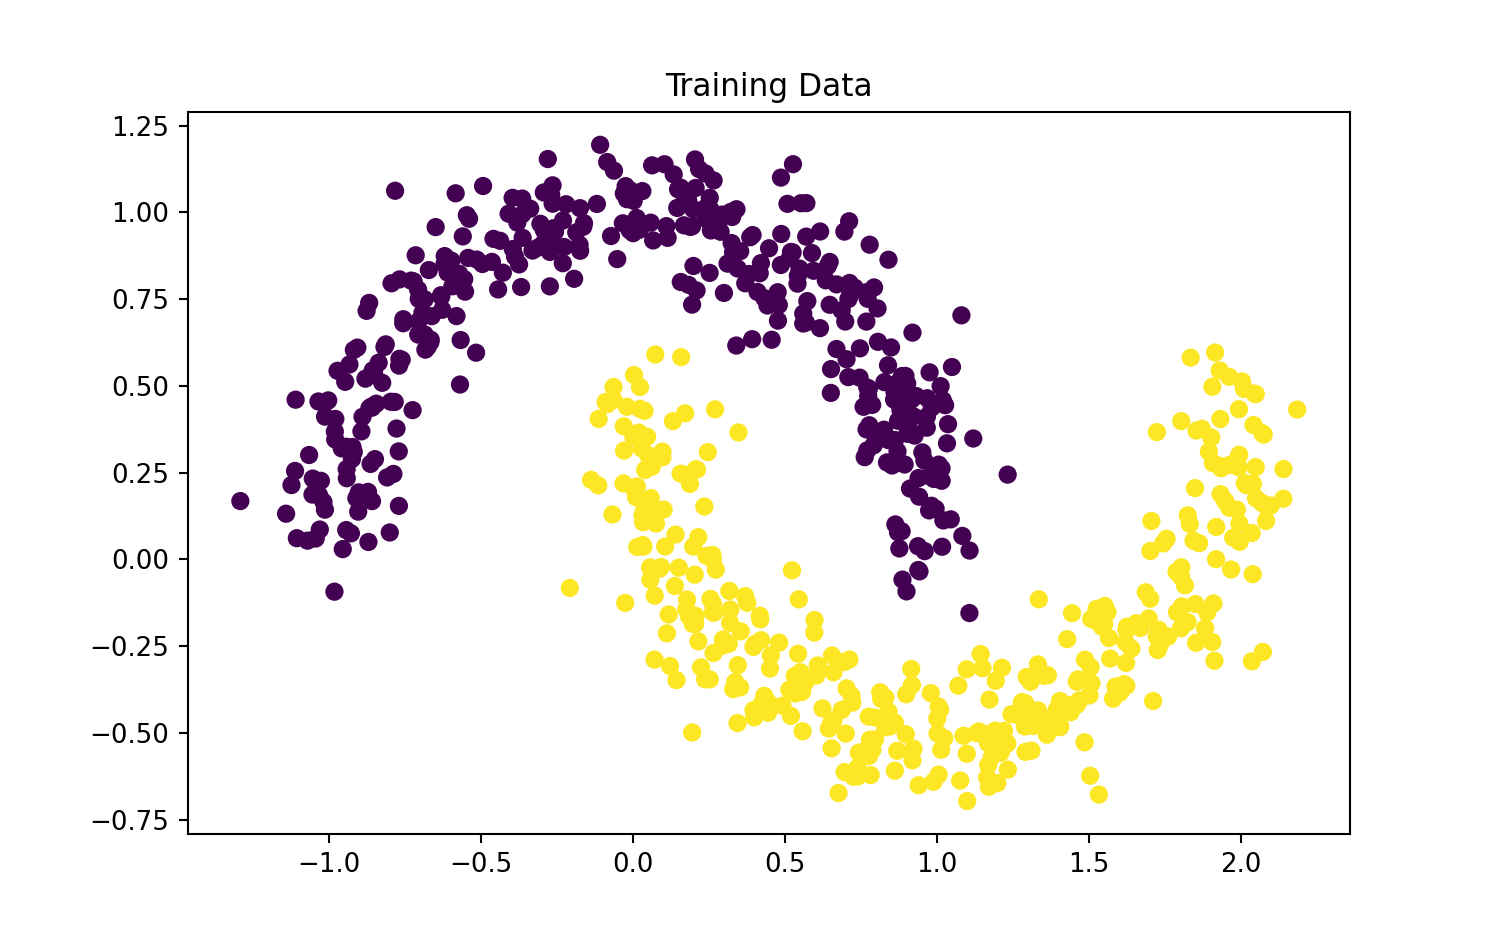

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [44]:
# modify the functions to use the new DataFrame

def moon_scikit_clf_fit_score(x_train, y_train, x_test, y_test, dataset_num):
    
    # loop over each classifier in clf_list, fit, score, add score to accuracy_df
    dataset = f'Dataset {dataset_num}'
    
    for i in range(6):
        clf_list[i].fit(x_train, y_train)
        score = clf_list[i].score(x_test, y_test)
        moon_accuracy_df.loc[clf_names[i], dataset] = score
        print(f'{clf_names[i]}: {score}')

In [45]:
def moon_keras_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # three layer model with ReLU applied to the first two layers
    # and sigmoid to the last one
    model = Sequential([
    Dense(30, input_shape=(x_train.shape[1],), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])
    
    # compile the model using binary crossentropy as the loss function and
    # binary accuracy as the evaluation metric
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    model.fit(x_train, y_train, epochs = n_epochs)
    
    # evaluate using the test data
    results = model.evaluate(x_test, y_test)
    moon_accuracy_df.loc['Keras NN', dataset] = float(f'{results[1]:.3}')
    print(results)

In [46]:
def moon_pytorch_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # initialize a neural network
    net = TorchBinaryClassifier(x_train.shape[1])
    
    # get data loaders from the training and testing data
    train_loader, test_loader = pytorch_loaders(x_train, y_train, x_test, y_test)
    
    # train the network
    pytorch_train(net, train_loader)
    
    # add a blank line for a clearer print-out
    print('\n')
    # test the network
    accuracy = pytorch_test(net, test_loader)
    moon_accuracy_df.loc['PyTorch NN', dataset] = accuracy

In [47]:
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 1)

Logistic Regression: 0.88
Decision Tree Classifier: 0.992
Linear SVC: 0.88
KNN Classifier: 0.996
Random Forest Classifier: 0.988
Gradient Boosting Classfier: 0.992


In [48]:
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5840 - binary_accuracy: 0.7533
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4974 - binary_accuracy: 0.8053
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4179 - binary_accuracy: 0.8240
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3481 - binary_accuracy: 0.8453
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3018 - binary_accuracy: 0.8747
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2756 - binary_accuracy: 0.8827
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2601 - binary_accuracy: 0.8813
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2498 - binary_accuracy: 0.8840
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2423 - binary_accuracy: 0.8813
Epoch 10/50
24/24 [==============================] - 0s

In [49]:
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

PyTorch model training...
Epoch: 1, training loss: 0.350220550686121
Epoch: 2, training loss: 0.18606184306647627
Epoch: 3, training loss: 0.11975557319955744
Epoch: 4, training loss: 0.07305905180923583
Epoch: 5, training loss: 0.044415397432172994
Epoch: 6, training loss: 0.028540083165468823
Epoch: 7, training loss: 0.0195276602233259
Epoch: 8, training loss: 0.014195341719670674
Epoch: 9, training loss: 0.010756745736432795
Epoch: 10, training loss: 0.00842115395495144
Epoch: 11, training loss: 0.006933115404389564
Epoch: 12, training loss: 0.005581203693764754
Epoch: 13, training loss: 0.00492228200623858
Epoch: 14, training loss: 0.004166187886573937
Epoch: 15, training loss: 0.0038216274753444662
Epoch: 16, training loss: 0.003632497981503434
Epoch: 17, training loss: 0.003295650904151406
Epoch: 18, training loss: 0.0029230812948990207
Epoch: 19, training loss: 0.002749401626172054
Epoch: 20, training loss: 0.002338284396779784
Epoch: 21, training loss: 0.0024898677874249037
Epo

In [50]:
moon_accuracy_df

,Dataset 1,Dataset 2,Dataset 3
Logistic Regression,0.88,NaN,NaN
Decision Tree Classifier,0.992,NaN,NaN
Linear SVC,0.88,NaN,NaN
KNN Classifier,0.996,NaN,NaN
Random Forest Classifier,0.988,NaN,NaN
Gradient Boosting Classfier,0.992,NaN,NaN
Keras NN,0.976,NaN,NaN
PyTorch NN,0.996,NaN,NaN


In [51]:
moon_X_2, moon_Y_2 = make_moons(1000, noise = 0.3, random_state=47)
X_train, X_test, Y_train, Y_test = train_test_split(moon_X_2, moon_Y_2, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


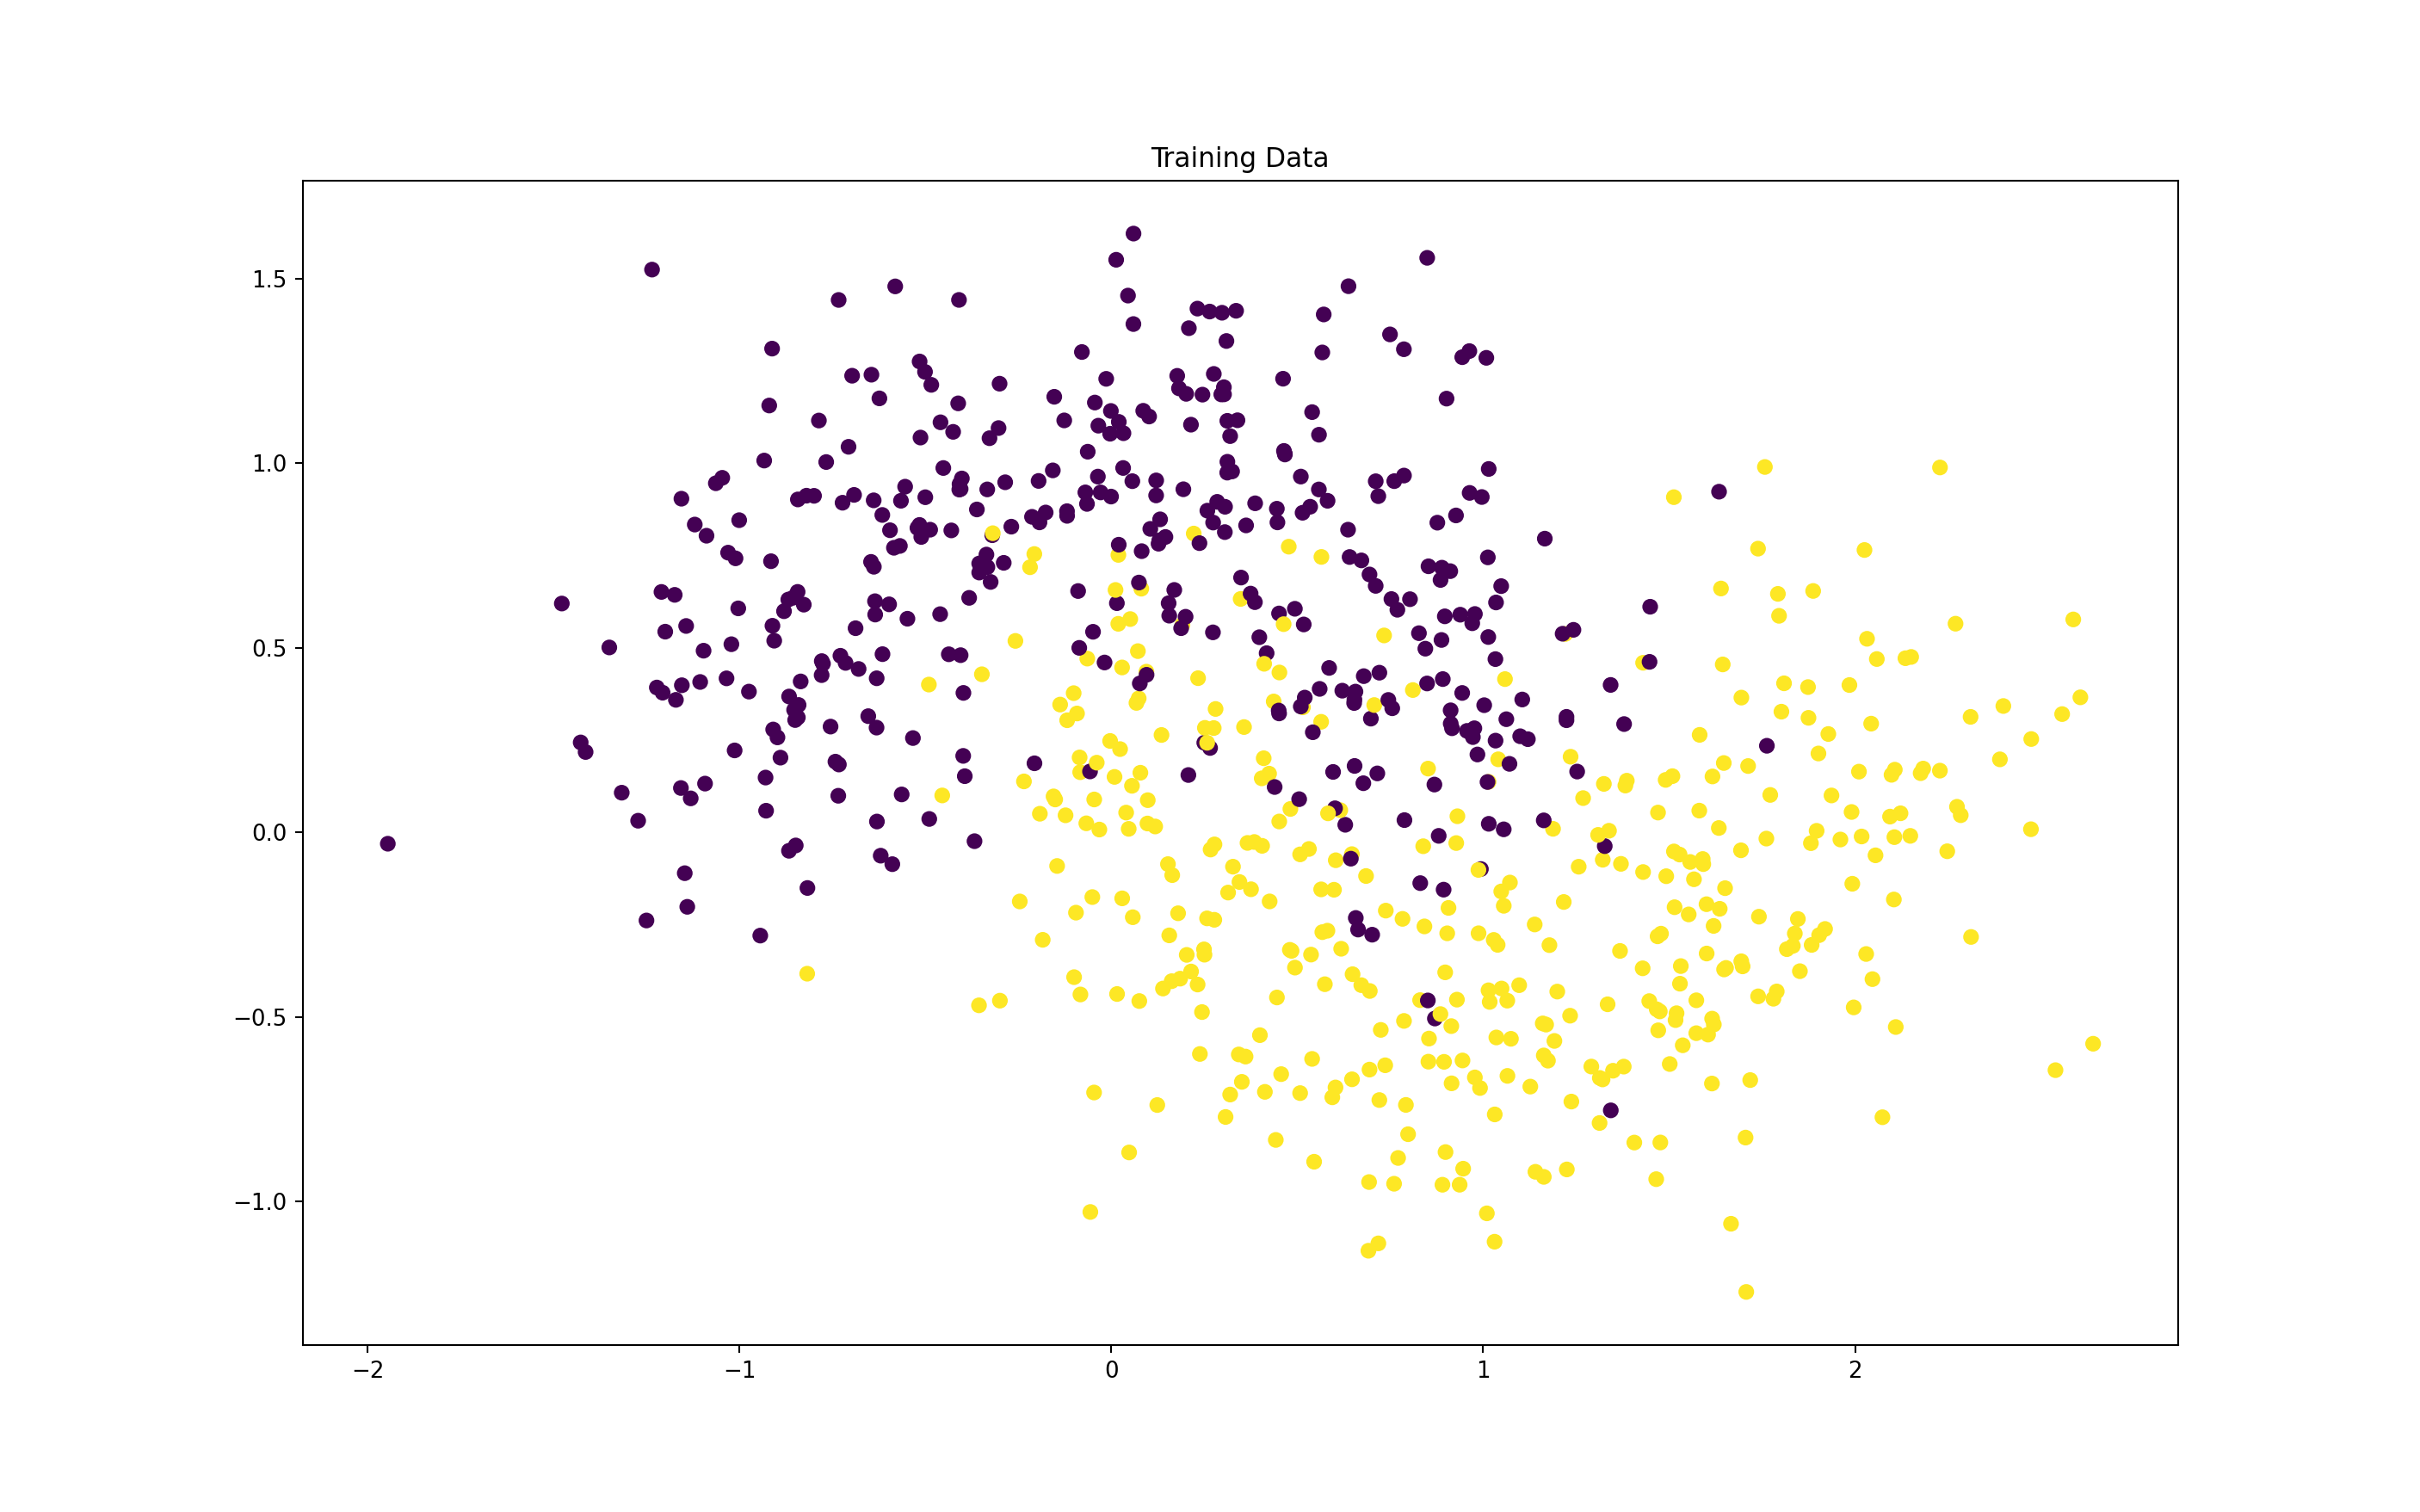

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [53]:
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 2)

Logistic Regression: 0.884
Decision Tree Classifier: 0.86
Linear SVC: 0.884
KNN Classifier: 0.888
Random Forest Classifier: 0.888
Gradient Boosting Classfier: 0.896


In [54]:
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 2)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6183 - binary_accuracy: 0.8093
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5168 - binary_accuracy: 0.8347
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4298 - binary_accuracy: 0.8373
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3687 - binary_accuracy: 0.8413
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3421 - binary_accuracy: 0.8400
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3320 - binary_accuracy: 0.8413
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3267 - binary_accuracy: 0.8467
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3227 - binary_accuracy: 0.8440
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3186 - binary_accuracy: 0.8480
Epoch 10/50
24/24 [==============================] - 0s

In [55]:
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 2)

PyTorch model training...
Epoch: 1, training loss: 0.42684657125857967
Epoch: 2, training loss: 0.30402071689480603
Epoch: 3, training loss: 0.28146269823806747
Epoch: 4, training loss: 0.26418643657715196
Epoch: 5, training loss: 0.2516090601475771
Epoch: 6, training loss: 0.2429050342859846
Epoch: 7, training loss: 0.23727990409631472
Epoch: 8, training loss: 0.2337002544170478
Epoch: 9, training loss: 0.23101283036679623
Epoch: 10, training loss: 0.22950981371888377
Epoch: 11, training loss: 0.22820189227092866
Epoch: 12, training loss: 0.2270231502854974
Epoch: 13, training loss: 0.22644517339050563
Epoch: 14, training loss: 0.22571766912442343
Epoch: 15, training loss: 0.22503464487927527
Epoch: 16, training loss: 0.22458054734912067
Epoch: 17, training loss: 0.22386750900032715
Epoch: 18, training loss: 0.223319124269208
Epoch: 19, training loss: 0.22254117095230663
Epoch: 20, training loss: 0.22199847497679373
Epoch: 21, training loss: 0.22146824376074475
Epoch: 22, training los

In [56]:
moon_accuracy_df

,Dataset 1,Dataset 2,Dataset 3
Logistic Regression,0.88,0.884,NaN
Decision Tree Classifier,0.992,0.86,NaN
Linear SVC,0.88,0.884,NaN
KNN Classifier,0.996,0.888,NaN
Random Forest Classifier,0.988,0.888,NaN
Gradient Boosting Classfier,0.992,0.896,NaN
Keras NN,0.976,0.904,NaN
PyTorch NN,0.996,0.896,NaN
